In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../python_tools/')
from tools import *
from tools_native import *
from tools_mapping import *

In [4]:
#on grid cell
#highirr
Cendrosa_lon=0.755
Cendrosa_lat=41.63
#lowirr
ElsPlans_lon=0.996
ElsPlans_lat=41.51

# alt for these grid cells : (307.6005859375, 456.8945007324219)

In [5]:
#actual data from LIAISE db
Cendrosa_Latitude=41.69336
Cendrosa_Longitude=0.928538
Cendrosa_altitude= 240

ElsPlans_Latitude = 41.590111
ElsPlans_Longitude = 1.029363
ElsPlans_altitude = 334

In [6]:
def add_liaise_site_loc(ax=None):
    if ax is not None:
        ax.plot(Cendrosa_lon, Cendrosa_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        ax.plot(ElsPlans_lon, ElsPlans_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        ax.plot(Cendrosa_Longitude, Cendrosa_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
        ax.plot(ElsPlans_Longitude, ElsPlans_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
    else:
        plt.plot(Cendrosa_lon, Cendrosa_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        plt.plot(ElsPlans_lon, ElsPlans_lat, 'go', markersize=10, transform=ccrs.Geodetic())
        plt.plot(Cendrosa_Longitude, Cendrosa_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())
        plt.plot(ElsPlans_Longitude, ElsPlans_Latitude, 'ro', markersize=10, transform=ccrs.Geodetic())

In [7]:
def locate_grid_cell(ds, lon, lat):
    """Edit the grid cell closest to the given lon/lat with new values."""
    dist = haversine(ds.nav_lat, ds.nav_lon, lat, lon)
    closest_idx = dist.argmin(...)
    print(closest_idx)

def locate_grid_cell_var(ds, varname, value):
    dist = np.abs(ds[varname]-value)
    closest_idx = dist.argmin()
    print(closest_idx)

# Restarts

In [ ]:
modif_dir='../../modif_ORCmaps' #adapt if on spirit or local

irr=True

change_PFT=False

In [ ]:
if irr:
    # restart_filename='{}/restarts/sim258_20210630_sechiba_rest_original.nc'.format(modif_dir)
    # restart_new_filename='{}/restarts/sim258_20210630_sechiba_rest_new.nc'.format(modif_dir)
else :
    # restart_filename='{}/restarts/sim248_20210630_sechiba_rest_original.nc'.format(modif_dir)
    # restart_new_filename='{}/restarts/sim248_20210630_sechiba_rest_new.nc'.format(modif_dir)
    # restart_filename='{}/restarts/sim258_20210131_sechiba_rest_original.nc'.format(modif_dir)
    # restart_new_filename='{}/restarts/sim258_20210131_sechiba_rest_new.nc'.format(modif_dir)

restart=xr.open_dataset(restart_filename, decode_times=False)

restart

In [ ]:
var='irrigmap_dyn'
value=326599456.0
locate_grid_cell_var(restart, var, value)
value=95288328.0
locate_grid_cell_var(restart, var, value)

In [ ]:
cen_idx=2877
els_idx=2823

## Print before

In [ ]:
#Cendrosa
ds=restart
print("Lon, lat")
print(ds['nav_lon'][cen_idx,0].values)
print(ds['nav_lat'][cen_idx,0].values)
if irr:
    print("aei_sw, irrigmap_dyn")
    print(ds['fraction_aeirrig_sw'][:,cen_idx,0].values)
    print(ds['irrigmap_dyn'][:,cen_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,cen_idx,:].values)

In [ ]:
#Els Plans
ds=restart
print("Lon, lat")
print(ds['nav_lon'][els_idx,0].values)
print(ds['nav_lat'][els_idx,0].values)
if irr:
    print("aei_sw, irrigmap_dyn")
    print(ds['fraction_aeirrig_sw'][:,els_idx,0].values)
    print(ds['irrigmap_dyn'][:,els_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,els_idx,:].values)

## Make changes

In [ ]:
if change_PFT: #chose 12 or 13 (=11 or 12...)
    for i in range(15):
        restart['veget_max'][0,i,cen_idx,0]=0.0
        restart['veget_max'][0,i,els_idx,0]=0.0
    restart['veget_max'][0,12,cen_idx,0]=1.0
    restart['veget_max'][0,12,els_idx,0]=1.0

if irr: #watch for this
    restart['irrigmap_dyn'][0,cen_idx,0]=5e+8
    restart['irrigmap_dyn'][0,els_idx,0]=0.0

#export to netcdf
if os.path.exists(restart_new_filename):
    print('Removing existing file')
    os.remove(restart_new_filename)
restart.to_netcdf(restart_new_filename)

restart2=xr.open_dataset(restart_new_filename, decode_times=False)
restart2

## Print after

In [ ]:
#Cendrosa
ds=restart2
print("Lon, lat")
print(ds['nav_lon'][cen_idx,0].values)
print(ds['nav_lat'][cen_idx,0].values)
if irr:
    print("aei_sw, irrigmap_dyn")
    print(ds['fraction_aeirrig_sw'][:,cen_idx,0].values)
    print(ds['irrigmap_dyn'][:,cen_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,cen_idx,:].values)

In [ ]:
#Els Plans
ds=restart2
print("Lon, lat")
print(ds['nav_lon'][els_idx,0].values)
print(ds['nav_lat'][els_idx,0].values)
if irr:
    print("aei_sw, irrigmap_dyn")
    print(ds['fraction_aeirrig_sw'][:,els_idx,0].values)
    print(ds['irrigmap_dyn'][:,els_idx,:].values)
print("veget_max")
for i in range(15):
    print(ds['veget_max'][:,i,els_idx,:].values)

# Modify PFTmap

In [ ]:
# filename='/data/ptiengou/PFTmap_2014.nc'
filename='../../data/modif_ORCmaps/PFTmap_2014.nc'
map0=xr.open_dataset(filename, decode_times=False)
#select subset
# map=map0.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))
map=map0
#rename time
map=map.rename({'time_counter':'time'})
#add var or pft12
# map['pft12'] = map['maxvegetfrac'][0,11,:,:]

map

In [ ]:
vmin,vmax=0,1

In [ ]:
#Display map of var for ds on restricted area
var='maxvegetfrac'
nb=11
ds = map

latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var][:,nb,:,:]

map_plotvar(plotvar, cmap=myvir,title=var+'_'+str(nb+1),vmin=0,vmax=1)


In [ ]:
def change_pfts(ds, lon_min, lon_max, lat_min, lat_max, var_name='maxvegetfrac', output_file='pftmap_new.nc'):
    ds = ds.copy()  # Ensure we don't modify the original dataset
    
    # Select the latitude and longitude range
    selected = ds[var_name].sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

    # Set all k values to 0 in the selected region
    ds[var_name].loc[:,:, selected.lat, selected.lon] = 0
    
    # Set k=12 to 1 in the selected region
    ds[var_name].loc[:,12, selected.lat, selected.lon] = 1

    ds.to_netcdf(output_file)
    print(f"Dataset saved as {output_file}")

    return ds

In [ ]:
lonmin=0.5
lonmax=1.2
latmin=41.4
latmax=41.8
output_file='../../data/PFTmap_2014_new.nc'
# newds=change_pfts(map0, lonmin, lonmax, latmin, latmax, output_file=output_file)

In [ ]:
filename=output_file
map1=xr.open_dataset(filename, decode_times=False)
map1

In [ ]:
#Display map of var for ds on restricted area
var='maxvegetfrac'
nb=11
ds = map

latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

latmin=41.35
latmax=42
lonmin=0.45
lonmax=1.35

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var][:,nb,:,:]

map_plotvar(plotvar, cmap='viridis',title=var+'_'+str(nb+1),vmin=0,vmax=1)
add_liaise_site_loc()

# Modify irrigmap

In [ ]:
def change_irrig(ds, newval, lon_min, lon_max, lat_min, lat_max, var_name='irrig', output_file='irrigmap_new.nc'):
    ds = ds.copy()  # Ensure we don't modify the original dataset
    
    # Select the latitude and longitude range
    selected = ds[var_name].sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

    # Set all k values to 0 in the selected region
    ds[var_name].loc[selected.lat, selected.lon] = newval

    ds.to_netcdf(output_file)
    print(f"Dataset saved as {output_file}")

    return ds

In [ ]:
# filename='/data/ptiengou/PFTmap_2014.nc'
filename='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped.nc'
irrmap0=xr.open_dataset(filename, decode_times=False)
irrmap=irrmap0

irrmap

In [ ]:
zero_lonmin, zero_lonmax = 0.9, 1.2
zero_latmin, zero_latmax = 41.4, 41.7
# zero_lonmin, zero_lonmax = 0.8, 1.2
# zero_latmin, zero_latmax = 41.4, 41.62
newval=0
output_file='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
newds=change_irrig(irrmap0, newval, zero_lonmin, zero_lonmax, zero_latmin, zero_latmax, output_file=output_file)


In [ ]:
hundred_lonmin, hundred_lonmax = 0.5, 0.9
hundred_latmin, hundred_latmax = 41.5, 41.8
# hundred_lonmin, hundred_lonmax = 0.8, 1.2
# hundred_latmin, hundred_latmax = 41.62, 41.85
newval=100
output_file='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
newds=change_irrig(newds, newval, hundred_lonmin, hundred_lonmax, hundred_latmin, hundred_latmax, output_file=output_file)

In [ ]:
filename='../../data/modif_ORCmaps/IRRIGmap2012_FillValue_cropped_new.nc'
irrmap1=xr.open_dataset(filename, decode_times=False)
irrmap1

In [ ]:
#Display map of var for ds on restricted area
var='irrig'
ds = irrmap
ds=newds
ds=irrmap1

lat_min, lat_max, lon_min, lon_max = 41.35, 41.82, 0.45, 1.35  
# lat_min, lat_max, lon_min, lon_max = 41., 42., 0., 2.  
# lat_min, lat_max, lon_min, lon_max = 36.0, 44, -10, 3.5  

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var]

map_plotvar(plotvar, cmap='viridis',title='Irrig_frac (%)',vmin=0,vmax=100)
add_liaise_site_loc()

# Restart routing

In [8]:
modif_dir='../../modif_ORCmaps' #adapt if on spirit or local

irr=True

In [9]:
if irr:
    # restart_routing_filename='{}/restarts/sim258_20210630_routing_restart_original.nc'.format(modif_dir)
    # restart_routing_new_filename='{}/restarts/sim258_20210630_routing_restart_new.nc'.format(modif_dir)
    restart_routing_filename='{}/restarts/sim277_20210630_routing_restart.nc_original'.format(modif_dir)
    restart_routing_new_filename='{}/restarts/sim277_20210630_routing_restart.nc_full'.format(modif_dir)

restart_routing=xr.open_dataset(restart_routing_filename, decode_times=False)

#add units (kg) to all vars
restart_routing['fast_reservoir'].attrs['units']='kg'
restart_routing['slow_reservoir'].attrs['units']='kg'
restart_routing['stream_reservoir'].attrs['units']='kg'


restart_routing

<xarray.Dataset>
Dimensions:           (lat: 630, lon: 840)
Coordinates:
  * lat               (lat) float32 46.49 46.47 46.46 ... 36.04 36.03 36.01
  * lon               (lon) float32 -9.992 -9.975 -9.958 ... 3.958 3.975 3.992
Data variables:
    fast_reservoir    (lat, lon) float64 ...
    slow_reservoir    (lat, lon) float64 ...
    stream_reservoir  (lat, lon) float64 ...
Attributes:
    name:         routing_restart
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-May-29 13:27:53 GMT
    uuid:         ac582d08-4b3d-441b-8b82-eec950b0cc92

## Print before

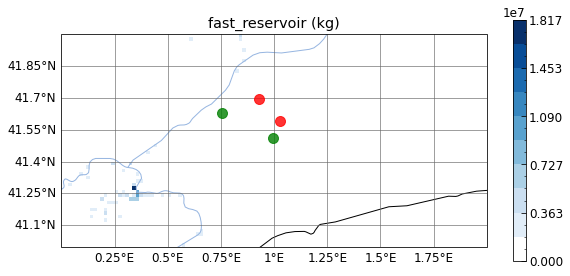

In [10]:
ds=restart_routing
var='stream_reservoir'
# var='slow_reservoir'
var='fast_reservoir'
cmap=bluesW

lat_min, lat_max, lon_min, lon_max = 41.35, 41.82, 0.45, 1.35  
lat_min, lat_max, lon_min, lon_max = 41., 42., 0., 2.  
# lat_min, lat_max, lon_min, lon_max = 36.0, 44, -10, 3.5  

ds = ds.where(ds.lat >= lat_min, drop=True).where(ds.lat <= lat_max, drop=True)
ds = ds.where(ds.lon >= lon_min, drop=True).where(ds.lon <= lon_max, drop=True)

map_ave(ds, var, cmap=cmap)
add_liaise_site_loc()

## Make changes

In [11]:
#make all reservoirs 10e+10 in given zone
lat_min, lat_max, lon_min, lon_max = 41., 43., 0., 2.  
ds=restart_routing

# Select the region of interest
region = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Assign the value 1e+8 to the specified variables within the region
region['fast_reservoir'] = 1e+10
region['slow_reservoir'] = 1e+10
region['stream_reservoir'] = 1e+10

# Assign the modified region back to the original dataset
ds['fast_reservoir'] = xr.where((ds.lat >= lat_min) & (ds.lat <= lat_max) & (ds.lon >= lon_min) & (ds.lon <= lon_max), region['fast_reservoir'], ds['fast_reservoir'])
ds['slow_reservoir'] = xr.where((ds.lat >= lat_min) & (ds.lat <= lat_max) & (ds.lon >= lon_min) & (ds.lon <= lon_max), region['slow_reservoir'], ds['slow_reservoir'])
ds['stream_reservoir'] = xr.where((ds.lat >= lat_min) & (ds.lat <= lat_max) & (ds.lon >= lon_min) & (ds.lon <= lon_max), region['stream_reservoir'], ds['stream_reservoir'])

#export to netcdf
if os.path.exists(restart_routing_new_filename):
    print('Removing existing file')
    os.remove(restart_routing_new_filename)
restart_routing.to_netcdf(restart_routing_new_filename)

restart_routing_2=xr.open_dataset(restart_routing_new_filename, decode_times=False)
#add units (kg) to all vars
restart_routing_2['fast_reservoir'].attrs['units']='kg'
restart_routing_2['slow_reservoir'].attrs['units']='kg'
restart_routing_2['stream_reservoir'].attrs['units']='kg'
restart_routing_2

<xarray.Dataset>
Dimensions:           (lat: 630, lon: 840)
Coordinates:
  * lat               (lat) float32 46.49 46.47 46.46 ... 36.04 36.03 36.01
  * lon               (lon) float32 -9.992 -9.975 -9.958 ... 3.958 3.975 3.992
Data variables:
    fast_reservoir    (lat, lon) float64 ...
    slow_reservoir    (lat, lon) float64 ...
    stream_reservoir  (lat, lon) float64 ...
Attributes:
    name:         routing_restart
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-May-29 13:27:53 GMT
    uuid:         ac582d08-4b3d-441b-8b82-eec950b0cc92

## Print after

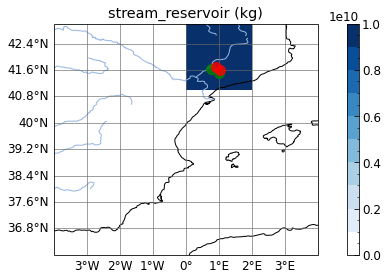

In [12]:
ds=restart_routing_2
var='stream_reservoir'
# var='slow_reservoir'
# var='fast_reservoir'
cmap=bluesW

lat_min, lat_max, lon_min, lon_max = 41.35, 41.82, 0.45, 1.35  
lat_min, lat_max, lon_min, lon_max = 41., 42., 0., 2.  
# lat_min, lat_max, lon_min, lon_max = 36.0, 44, -10, 3.5  
# lat_min, lat_max, lon_min, lon_max = 36.0, 44, -10, 3.5  
lat_min, lat_max, lon_min, lon_max =36,43,-4, 4

ds = ds.where(ds.lat >= lat_min, drop=True).where(ds.lat <= lat_max, drop=True)
ds = ds.where(ds.lon >= lon_min, drop=True).where(ds.lon <= lon_max, drop=True)

map_ave(ds, var, cmap=cmap)
add_liaise_site_loc()